## Sorting Contours

We can sort contours in many ways.

0 - Original Image


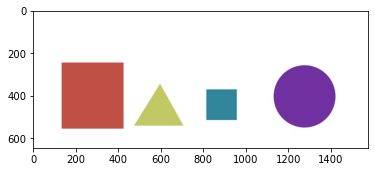

1 - Canny Edges


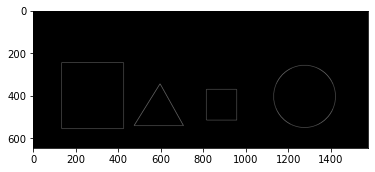

Number of contours found =  4
3 - All Contours


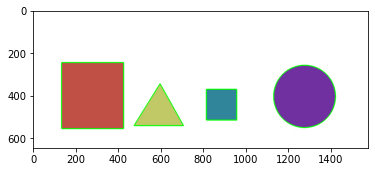

In [2]:
import cv2
import numpy as np
from show import show
# Load our image
image = cv2.imread('images/bunchofshapes.jpg')
cv2.imshow('0 - Original Image', image)
show('0 - Original Image', image)
cv2.waitKey(0)

# Create a black image with same dimensions as our loaded image
blank_image = np.zeros((image.shape[0], image.shape[1], 3))

# Create a copy of our original image
orginal_image = image

# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
cv2.imshow('1 - Canny Edges', edged)
show('1 - Canny Edges', edged)
cv2.waitKey(0)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print ("Number of contours found = ", len(contours))

#Draw all contours
cv2.drawContours(blank_image, contours, -1, (0,255,0), 3)
cv2.imshow('2 - All Contours over blank image', blank_image)
# show('2 - All Contours over blank image', blank_image)
cv2.waitKey(0)

# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2.imshow('3 - All Contours', image)
show('3 - All Contours', image)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Let's now sort by area

Contor Areas before sorting
[20587.5, 22901.5, 66579.5, 90222.0]
Contor Areas after sorting
[90222.0, 66579.5, 22901.5, 20587.5]
Contours by area


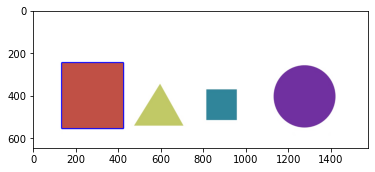

Contours by area


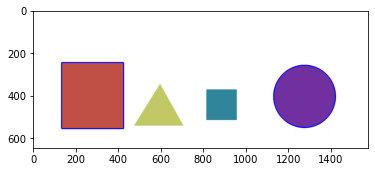

Contours by area


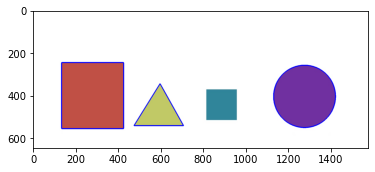

Contours by area


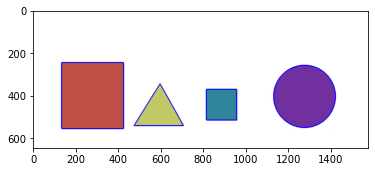

In [3]:
import cv2
import numpy as np

# Function we'll use to display contour area

def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
image = cv2.imread('images/bunchofshapes.jpg')
orginal_image = image

# Let's print the areas of the contours before sorting
print ("Contor Areas before sorting")
print (get_contour_areas(contours))

# Sort contours large to small
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
#sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]

print ("Contor Areas after sorting") 
print( get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for c in sorted_contours:
    cv2.drawContours(orginal_image, [c], -1, (255,0,0), 3)
    cv2.waitKey(0)
    cv2.imshow('Contours by area', orginal_image)
    show('Contours by area', orginal_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

6 - Left to Right Contour


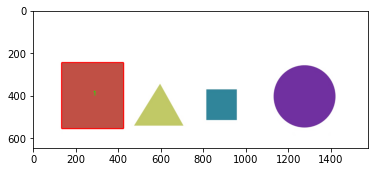

output_shape_number_1.jpg
6 - Left to Right Contour


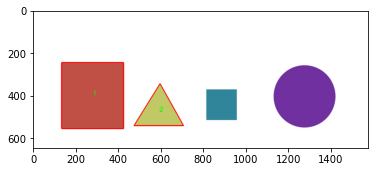

output_shape_number_2.jpg
6 - Left to Right Contour


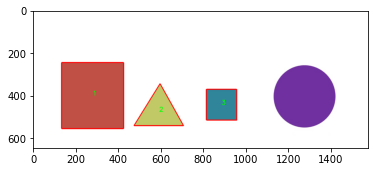

output_shape_number_3.jpg
6 - Left to Right Contour


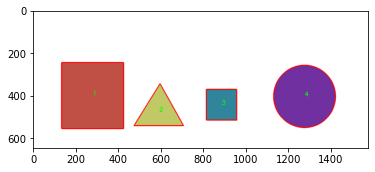

output_shape_number_4.jpg


In [4]:
import cv2
import numpy as np

# Functions we'll use for sorting by position

def x_cord_contour(contours):
    #Returns theX cordinate for the contour centroid
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

    
def label_contour_center(image, c):
    # Places a red circle on the centers of contours
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
 
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image


# Load our image
image = cv2.imread('images/bunchofshapes.jpg')
orginal_image = image.copy()


# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
 
cv2.imshow("4 - Contour Centers ", image)
cv2.waitKey(0)

# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)


# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('6 - Left to Right Contour', orginal_image)
    show('6 - Left to Right Contour', orginal_image)
    cv2.waitKey(0)
    (x, y, w, h) = cv2.boundingRect(c)  
    
    # Let's now crop each contour and save these images
    cropped_contour = orginal_image[y:y + h, x:x + w]
    image_name = "output_shape_number_" + str(i+1) + ".jpg"
    print (image_name)
    cv2.imwrite(image_name, cropped_contour)
    
cv2.destroyAllWindows()


